In [2]:
# import required libraries
from task_4 import *

%load_ext autoreload
%autoreload 2

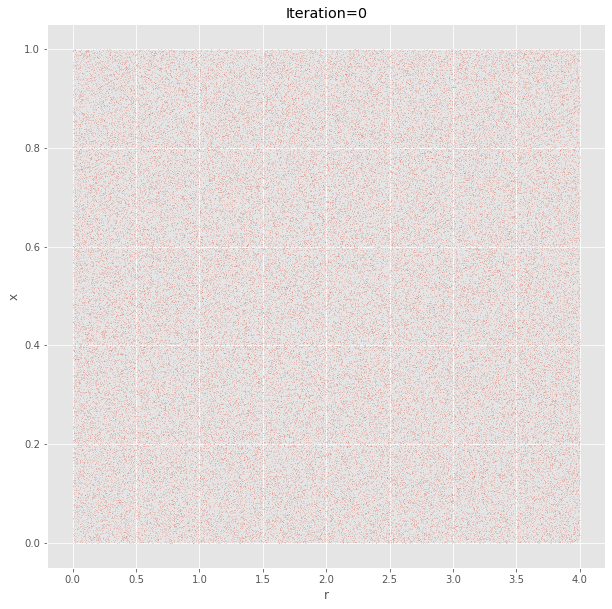

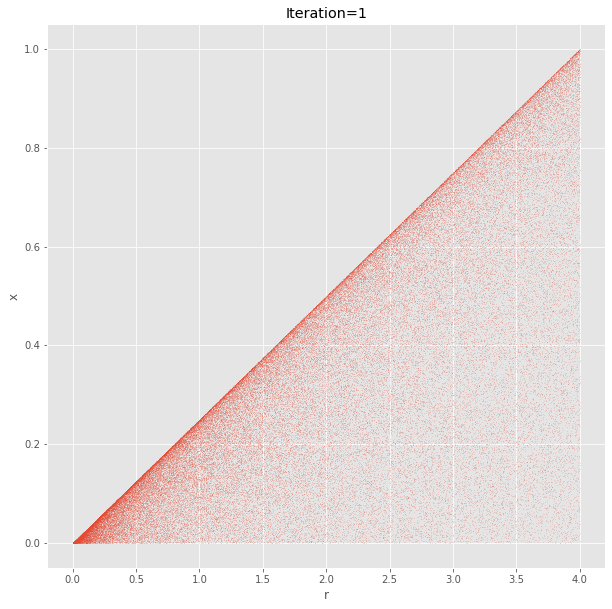

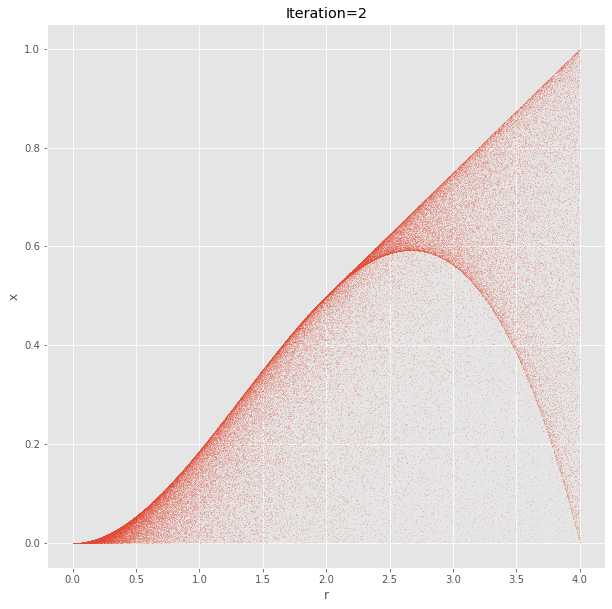

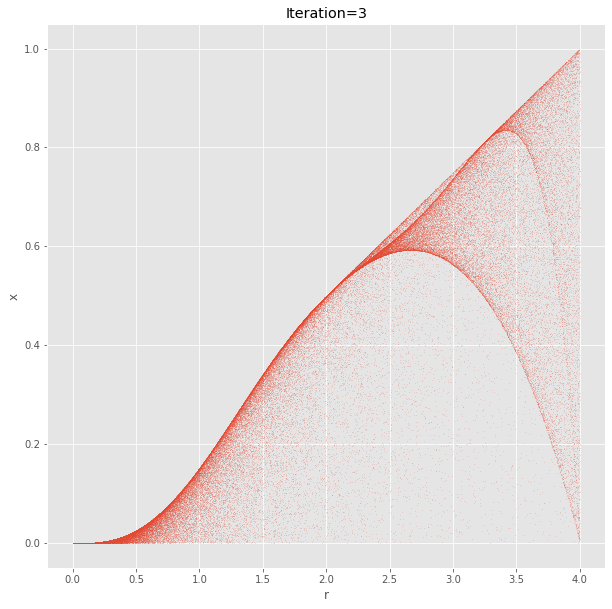

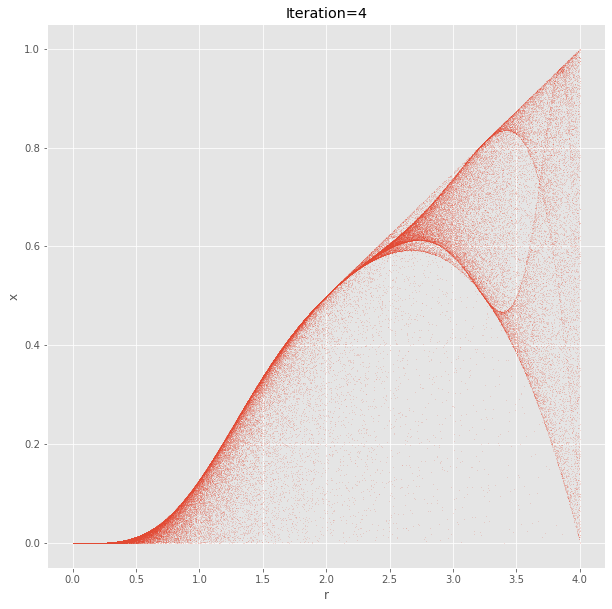

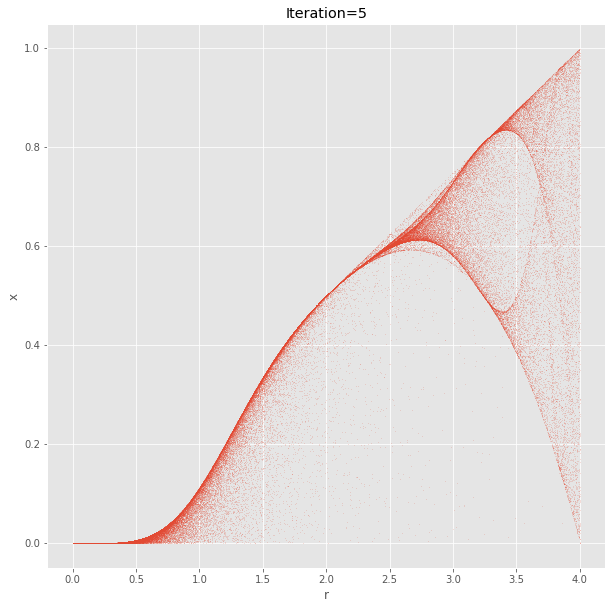

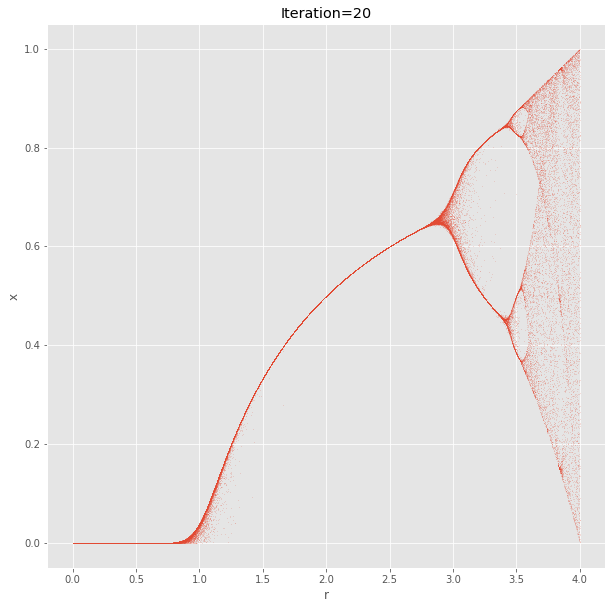

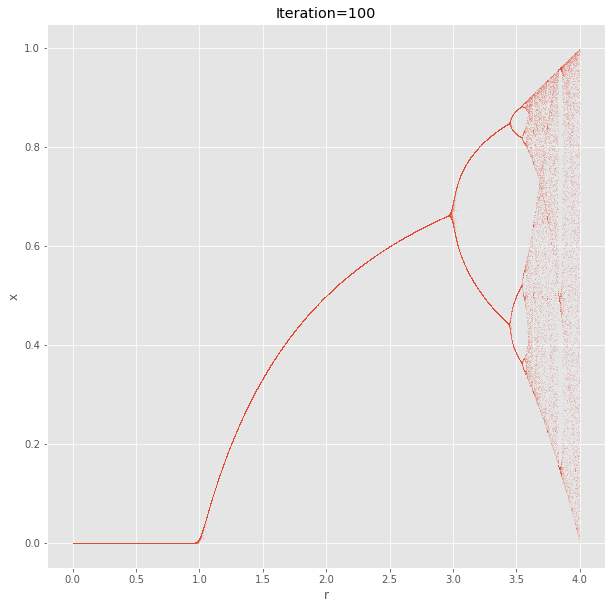

In [4]:
# plot specific iterations of the logistic map system
for iteration in [0, 1, 2, 3, 4, 5, 20, 100]:
    plot_logistic_map(iteration)

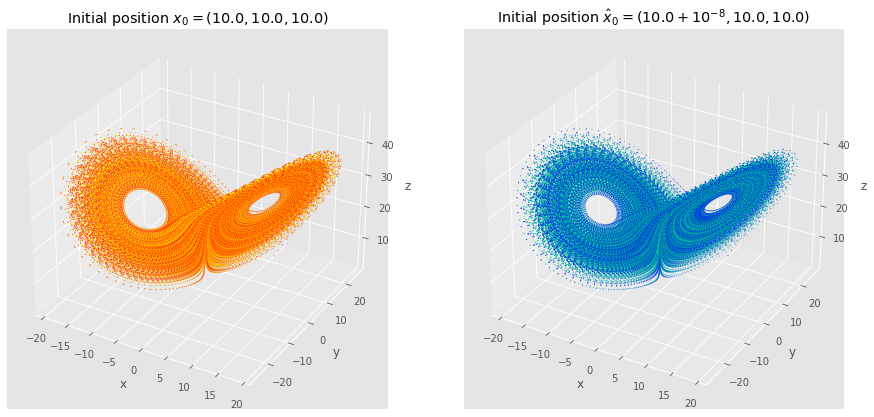

In [3]:
# parameters of Lorenz system
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
# last parameter differentiates between using plot() and scatter() methods to display trajectories (see also the last cell of this notebook)
states_diff, t = plot_lorenz_attractor(sigma, rho, beta, False)

The difference between the points on the trajectories are larger than 1 after 22.55 seconds.


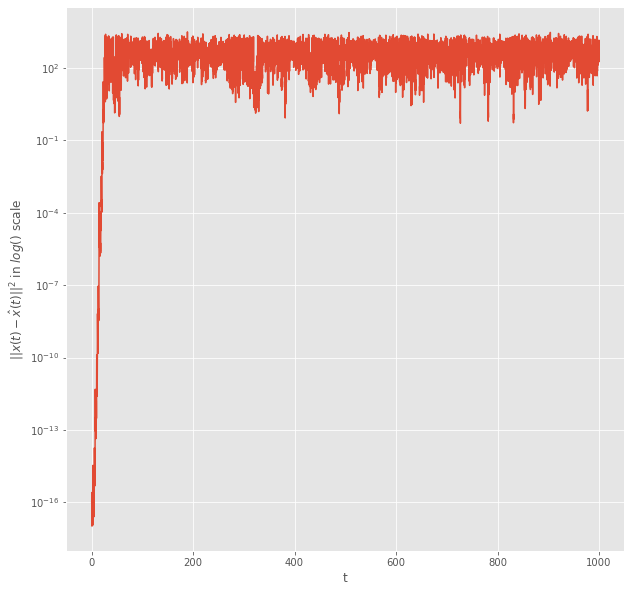

In [9]:
# plot the difference between trajectories against time
fig_ = plt.figure(figsize=(10, 10))
ax_ = fig_.add_subplot(1, 1, 1)
ax_.set_xlabel("t")
ax_.set_ylabel(r"$\|\|x(t) - \hat{x}(t)\|\|^{2}$ in $log()$ scale")
ax_.set_yscale("log")
ax_.plot(t, states_diff)

# find the first index where difference is larger than one and multiply it by (end_time - start_time) / iteration_count to find
# the time in seconds, where difference > 1 (end_time = 1000, start_time = 0, iteration_count = 100000 in our simulation)
idx = np.argwhere(states_diff > 1)
print("The difference between the points on the trajectories are larger than 1 after "+ str(idx[0][0] * 0.01) + " seconds.")

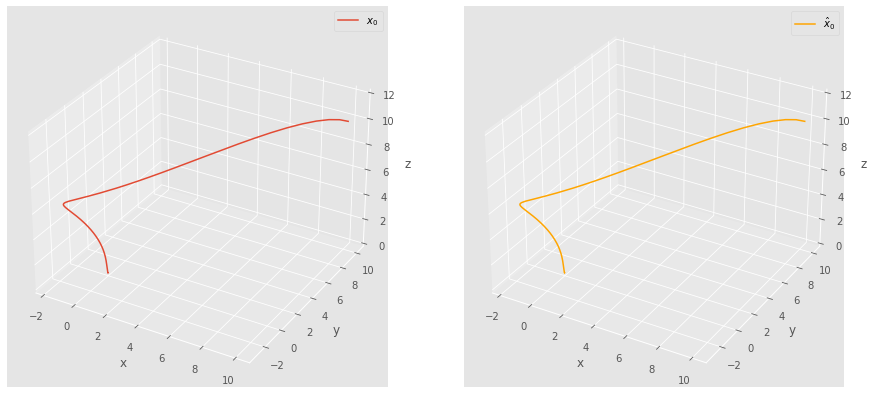

In [24]:
# change value of rho and plot two trajectories again (initial locations same as above)
rho = 0.5
# this time last parameter is set to True since we want to use the plot() method instead of scatter()
_ = plot_lorenz_attractor(sigma, rho, beta, True)